In [1]:
from __future__ import print_function 
from optimisation import min_max_df, my_g, opt_with_starts
from itertools import cycle
from model_scoring_func import my_sound
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')
sns.set_style('ticks', {'font.family': 'Cambria'})

In [3]:
con_list = ['rheomix stability_time_min',
            'rheomix final_deg_time_min',
            'tensile E_t_MPa',
            'tensile epsilon_break_%',
            'tensile sigma_break_MPa',
#             'LOI Final'
            'ConeCal MARHE_kW_m2',
            'ConeCal peak_HRR_kWpm2'
           ]

In [4]:
min_max_df(con_list)

,max,min
name,,
rheomix stability_time_min,141.400000,8.500000
rheomix final_deg_time_min,346.900000,12.600000
tensile E_t_MPa,1917.675000,23.640000
tensile epsilon_break_%,114.773333,9.817500
tensile sigma_break_MPa,29.512500,10.606667
ConeCal MARHE_kW_m2,179.159015,12.098409
ConeCal peak_HRR_kWpm2,242.755583,60.003085


In [5]:
con_limits = [25.0, 80.0, 300.0, 50.0, 18.0, 85.0, 125.0]

In [6]:
ingr_cost = [15.0, 8.0, 48.0, 45.0, 30.0, 40.0, 14.0]

In [7]:
cons = ({'type': 'eq',
         'fun': lambda x: sum(x) - 1},
        {'type': 'ineq', 
         'fun': my_g, 
         'args': [con_list, con_limits]})

In [8]:
bnds = [[0.0, 1.0] for i in range(7)]
bnds[0] = [0.4, 0.8]

In [9]:
vary = range(0, 181, 10)
# vary = [i/2.0 for i in range(0, 45*2 + 1, 5)]
# vary = [i/2.0 for i in range(80*2, 120*2 + 1, 5)]
print(vary)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]


In [10]:
fs = []
xs = []

In [11]:
for i in vary:
    print('---------------')
    print(i)
    con_limits[1] = i
#     ingr_cost[5] = i
    
#     if i <= 150:
#         continue
    
    best_res = opt_with_starts(ingr_cost, bnds, cons)
    
    fs.append(best_res.fun)
    xs.append(best_res.x)
    
my_sound()

---------------
0
21.0440296221
Optimization terminated successfully.
21.0440296008
Optimization terminated successfully.
21.044029621
Optimization terminated successfully.
21.4527898132
Optimization terminated successfully.
21.0440296784
Optimization terminated successfully.
---------------
10
21.0440295993
Optimization terminated successfully.
21.0440286459
Optimization terminated successfully.
21.0440295023
Optimization terminated successfully.
21.0440296222
Optimization terminated successfully.
21.2666478676
Optimization terminated successfully.
---------------
20
21.0440296215
Optimization terminated successfully.
21.0440296216
Optimization terminated successfully.
21.0440296226
Optimization terminated successfully.
21.0440288181
Optimization terminated successfully.
21.0440296224
Optimization terminated successfully.
---------------
30
21.0443323196
Optimization terminated successfully.
21.0443322872
Optimization terminated successfully.
21.0443322947
Optimization terminated succ

In [12]:
xs = map(list, zip(*xs))

In [13]:
ingredients = ['PVC', 'Filler', 'FR', 'Stabiliser', 'DINP', 'LDH', 'Sph. Filler']

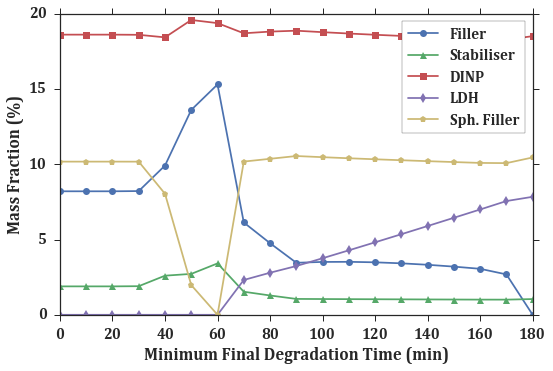

In [17]:
markers = ['-o', '-^', '-s', '-d', '-p', '-h', '-*']
m_cycle = cycle(markers)

fig_x = figure()
show = [1, 3, 4, 5, 6]

for x, l in zip([xs[i] for i in show], 
                [ingredients[i] for i in show]):
    x100 = [j*100 for j in x]
    plot(vary, x100, next(m_cycle), label=l)

legend(frameon=True, loc=1)
# legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# xlabel('LDH Cost (R/kg)')
ylabel('Mass Fraction (%)')
# xlabel('Maximum pHRR (kW' + u'\u00B7' + '$\mathregular{m^{-2}}$)')
xlabel('Minimum Final Degradation Time (min)')
# xlim([110, 140])


tight_layout()
# fig_x.savefig('Para_Deg_Time_Sph_Fill_14_Rpkg.pdf')

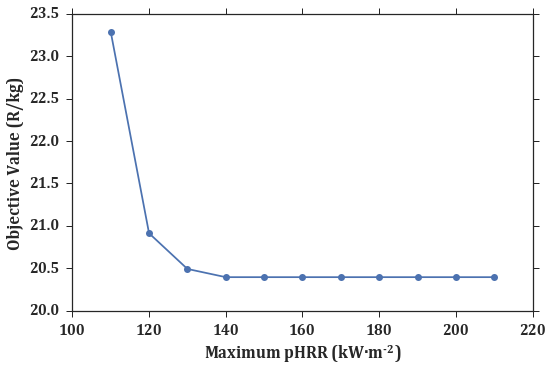

In [18]:
figf = figure()
plot(vary, fs, '-o')
# xlabel('LDH Cost (R/kg)')
# xlabel('Minimum Final Degradation Time (min)')
xlabel('Maximum pHRR (kW' + u'\u00B7' + '$\mathregular{m^{-2}}$)')
ylabel('Objective Value (R/kg)')

tight_layout()
# figf.savefig('Para_pHRR_obj.pdf')

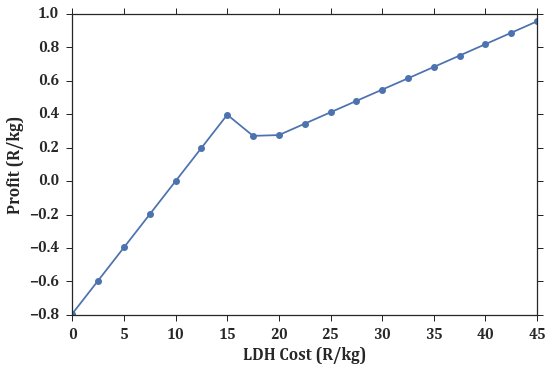

In [22]:
figP = figure()
plot(vary, [i*(j - 10) for i, j in zip(xs[5],vary)], '-o')

xlabel('LDH Cost (R/kg)')
ylabel('Profit (R/kg)')

tight_layout()
# figP.savefig('Para_LDH_Cost_Prof.pdf')